In [1]:
#adapted from Seurat WNN tutorial: https://satijalab.org/seurat/articles/weighted_nearest_neighbor_analysis
library(Seurat)
library(SeuratDisk)

The legacy packages maptools, rgdal, and rgeos, underpinning this package
will retire shortly. Please refer to R-spatial evolution reports on
https://r-spatial.org/r/2023/05/15/evolution4.html for details.
This package is now running under evolution status 0 

Attaching SeuratObject

Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat



In [16]:
Convert('/data/xinyi/citeseq_totalvi/totalVI_reproducibility/data/spleen_lymph_111_hvg_counts.h5ad', dest = "h5seurat", overwrite = TRUE)

Warning message:
“Unknown file type: h5ad”
Warning message:
“'assay' not set, setting to 'RNA'”
Creating h5Seurat file for version 3.1.5.9900

Adding X as scale.data

Adding X as data

Adding X as counts

Adding meta.features from var

Adding protein_expression as cell embeddings for protein_expression

Adding protein_names to miscellaneous data

Adding version to miscellaneous data



In [2]:
citeseq<-LoadH5Seurat('/data/xinyi/citeseq_totalvi/totalVI_reproducibility/data/spleen_lymph_111_hvg_counts.h5seurat', meta.data = FALSE, misc = FALSE)

Validating h5Seurat file

Initializing RNA with data

Adding counts for RNA

Adding scale.data for RNA

Adding feature-level metadata for RNA

Adding reduction protein_expression

Adding cell embeddings for protein_expression

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from protein_expression_ to proteinexpression_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to proteinexpression_”
Adding miscellaneous information for protein_expression

Adding command information

Adding tool-specific results



In [4]:
citeseq[['protein']]<-CreateAssayObject(as.matrix(citeseq@reductions$protein_expression))

ERROR: Error in as.vector(data): no method for coercing this S4 class to a vector


In [6]:
# Define file paths
protein_file <- "/data/xinyi/citeseq_totalvi/totalVI_reproducibility/data/spleen_lymph_111_hvg_protein.csv"
batch_file <- "/data/xinyi/citeseq_totalvi/totalVI_reproducibility/data/spleen_lymph_111_hvg_batchIndices.csv"
cell_types_file <- "/data/xinyi/citeseq_totalvi/totalVI_reproducibility/data/spleen_lymph_111_hvg_cell_types.csv"



In [7]:
protein_data <- as.matrix(read.csv(protein_file, header = FALSE))

In [8]:
row.names(protein_data)<-colnames(citeseq)

In [9]:
protein_data=t(protein_data)
protein_data

,TTAGTCTTCCCATTCG-2,TGTTGGATCAGCTGAT-1,GGTGTTAGTGCGGCTT-2,CTAACCCCAGGTCCCA-2,TGACGCGAGAGGACTC-2,CTGTATTTCTGCATAG-2,GGGCTACGTAACCAGG-1,TAAGTCGCAAGGATGC-1,ACGTCCTTCTTTCTAG-2,GAGTTGTTCGACTCCT-1,⋯,GTTCCGTTCCGTGCGA-1,AGGAGGTTCCATGAGT-1,TATCCTACAAAGTGTA-1,CAATCGAAGTTGCCTA-2,CAGAGCCAGACAACTA-2,GTGGTTAAGTCATGGG-1,TCATCATAGTTCCATG-2,CATGCAAAGCCAGAGT-2,AGTCATGTCACGGGAA-1,GTACAGTAGATTGACA-1
V1,82,16,51,110,36,116,24,29,74,21,⋯,20,68,43,51,40,28,20,74,28,85
V2,1,7,8,6,2,8,9,4,5,5,⋯,5,4,2,2,72,5,4,7,7,4
V3,0,3,1,5,3,5,3,2,4,6,⋯,3,2,1,5,5,8,4,5,8,3
V4,2,2,3,1,3,3,2,0,0,1,⋯,1,2,3,3,3,2,4,2,1,1
V5,3,8,6,2,0,0,5,1,4,1,⋯,5,3,0,2,11,2,3,6,4,5
V6,44,105,72,25,68,27,112,53,89,34,⋯,118,37,42,87,140,49,722,74,33,43
V7,2,1,2,0,1,1,1,2,5,0,⋯,5,0,2,0,1,6,4,4,2,3
V8,0,1,2,2,2,2,1,1,2,0,⋯,4,1,2,2,3,3,2,2,2,1
V9,2,4,1,1,4,1,4,0,1,3,⋯,8,2,3,1,5,1,5,1,0,2
V10,13,11,7,9,3,5,13,7,11,9,⋯,9,8,7,5,9,8,5,7,13,4


In [10]:
citeseq[['protein']]<-CreateAssayObject(as.matrix(protein_data))

In [13]:
DefaultAssay(citeseq) <- 'RNA'
citeseq <- NormalizeData(citeseq)
citeseq<-FindVariableFeatures(citeseq)
citeseq<-ScaleData(citeseq)
citeseq<-RunPCA(citeseq,reduction.name = 'pca')

DefaultAssay(citeseq) <- 'protein'
VariableFeatures(citeseq) <- rownames(citeseq[["protein"]])
citeseq <- NormalizeData(citeseq, normalization.method = 'CLR', margin = 2) 
citeseq<-ScaleData(citeseq)
citeseq<-RunPCA(citeseq,reduction.name = 'apca')

Centering and scaling data matrix

PC_ 1 
Positive:  Cd74, H2-Ab1, H2-Aa, H2-Eb1, Alox5ap, Tyrobp, Ifitm3, Cd300a, Napsa, Sirpa 
	   Unc93b1, Mpeg1, Cybb, Csf1r, Fcer1g, Ctsh, Spi1, Cd79a, Marcks, Tgfbi 
	   Ifitm2, Lrp1, Igsf6, Ccl6, Plbd1, Clec4a3, Clec4a1, AF251705, Igkc, Ms4a1 
Negative:  Trbc2, Cd3g, Ms4a4b, Cd3d, Trac, Skap1, Cd3e, Lat, Lef1, Tcf7 
	   Bcl11b, Thy1, Arl4c, Txk, Prkcq, Il7r, Trbc1, Itk, Klk8, Cd247 
	   Cd8b1, Cd28, Dapl1, Rpsa, Rgs10, Igfbp4, Cd5, Nkg7, Nsg2, Fam189b 
PC_ 2 
Positive:  Cd79a, Igkc, Iglc2, Iglc3, Ighm, Ms4a1, Cd74, Ly6d, H2-Eb1, H2-Aa 
	   H2-Ab1, Fcmr, Iglc1, Bcl11a, Tnfrsf13c, Fcrla, Vpreb3, Spib, Mzb1, Serpinb1a 
	   Blnk, Swap70, Cr2, Cd24a, Napsa, Snn, Gm43291, Malat1, Pkig, Blk 
Negative:  Fcer1g, Trbc2, Cd300a, Cd3g, Cd3d, Ms4a4b, Alox5ap, Ifitm2, Ifitm3, Csf1r 
	   Anxa2, Sirpa, Igsf6, Tgfbi, Ccl6, Arl4c, Lrp1, Skap1, Emb, Trac 
	   Clec4a1, S100a6, Clec4a3, Ifitm6, Rgs10, AF251705, Lyz2, Gsr, Mpeg1, Lcp2 
PC_ 3 
Positive:  Mki67, 2810417H

In [17]:

citeseq <- FindMultiModalNeighbors(
  citeseq, reduction.list = list("pca", "apca"), 
  dims.list = list(1:30, 1:18), modality.weight.name = "RNA.weight"
)

Calculating cell-specific modality weights

Finding 20 nearest neighbors for each modality.

Calculating kernel bandwidths

Warning message in FindMultiModalNeighbors(citeseq, reduction.list = list("pca", :
“The number of provided modality.weight.name is not equal to the number of modalities. RNA.weight protein.weight are used to store the modality weights”
Finding multimodal neighbors

Constructing multimodal KNN graph

Constructing multimodal SNN graph



In [18]:
citeseq <- RunUMAP(citeseq, nn.name = "weighted.nn", reduction.name = "wnn.umap", reduction.key = "wnnUMAP_")
citeseq <- FindClusters(citeseq, graph.name = "wsnn", algorithm = 3, resolution = 2, verbose = FALSE)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
18:17:46 UMAP embedding parameters a = 0.9922 b = 1.112

18:17:46 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 20

18:17:47 Initializing from normalized Laplacian + noise (using irlba)

18:17:47 Commencing optimization for 200 epochs, with 450520 positive edges

18:17:53 Optimization finished



In [48]:
batch_indices <- as.matrix(read.csv(batch_file, header = FALSE))
cell_types <- as.matrix(read.csv(cell_types_file, header = FALSE))

citeseq <- AddMetaData(citeseq, metadata = batch_indices, col.name = "batch_indices")
citeseq <- AddMetaData(citeseq, metadata = cell_types, col.name = "cell_types")

citeseq$batch_indices<-batch_indices
citeseq$cell_types<-cell_types

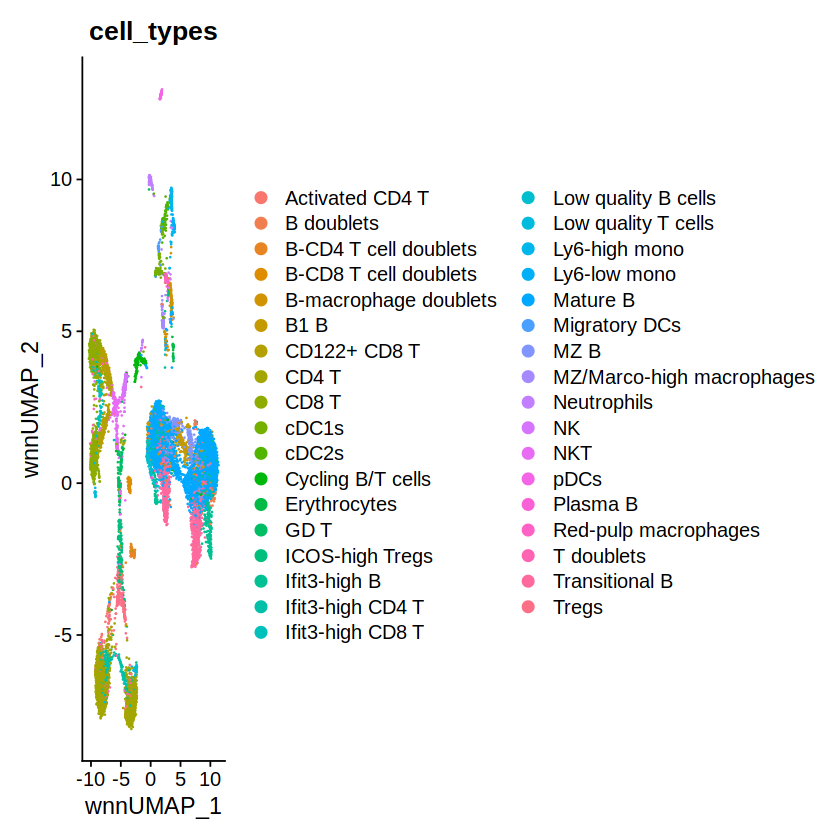

In [33]:
p1 <- DimPlot(citeseq, reduction = 'wnn.umap', group.by = 'cell_types', label = FALSE, repel = TRUE, label.size = 2.5) 
p2 <- DimPlot(citeseq, reduction = 'wnn.umap', group.by = 'batch_indices', label = FALSE, repel = TRUE, label.size = 2.5) 
p1

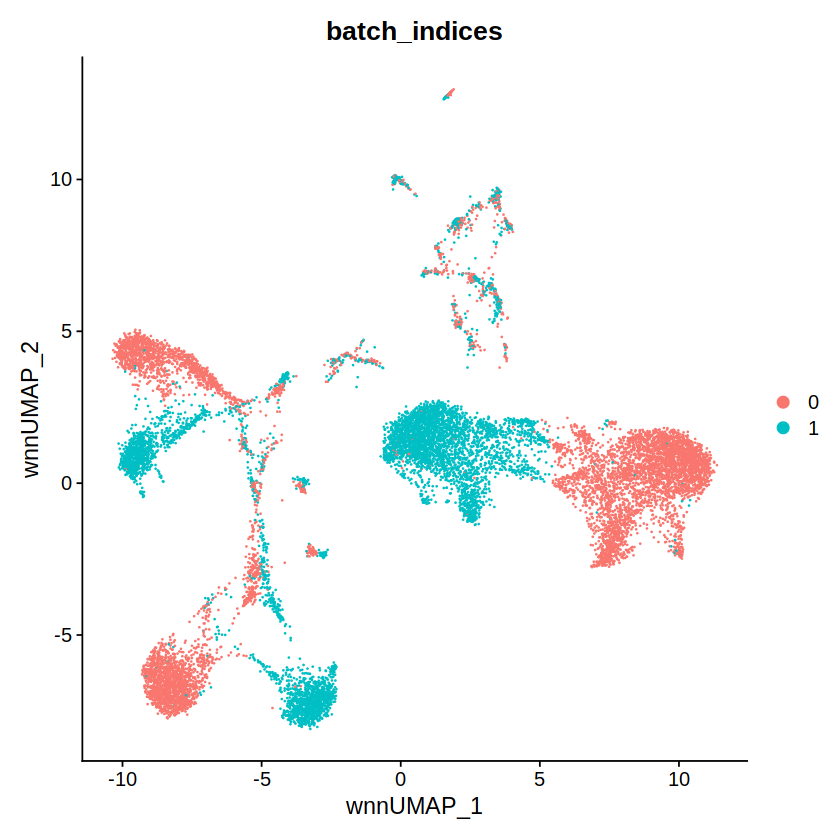

In [35]:
p2

In [39]:
# library(ggplot2)
# ggsave(filename = "celltypewnn.pdf", plot = p1, width = 10, height = 6, units = "in")  # Adjust width and height as needed
ggsave(filename = "batchwnn.pdf", plot = p2, width = 4, height = 4, units = "in")  # Adjust width and height as needed

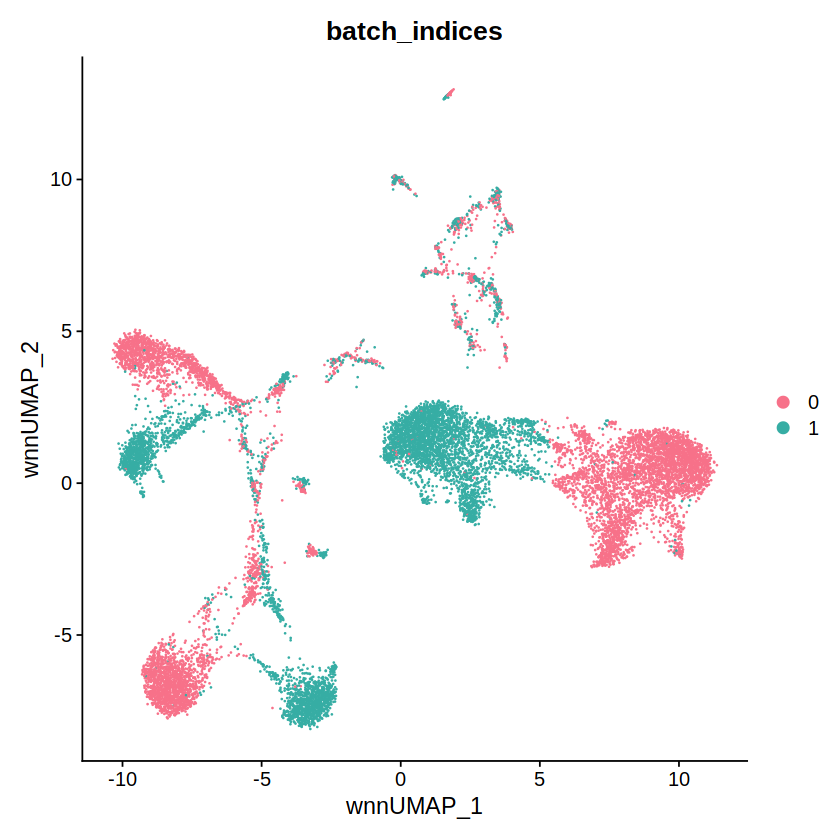

In [54]:
colors <- c('#f77189','#36ada4')

p2 <- DimPlot(citeseq, reduction = 'wnn.umap', group.by = 'batch_indices', label = FALSE, repel = TRUE, label.size = 2.5) +
  scale_color_manual(values = colors)  # Apply the custom color palette
ggsave(filename = "batchwnn.pdf", plot = p2, width = 4, height = 4, units = "in")
p2

In [52]:
ct_top3<-cell_types
for (ct in unique(ct_top3)) {
    if (ct == 'Activated CD4 T') {
        ct_top3[ct_top3 == ct] <- 'CD4+'
    } else if (ct %in% c('B doublets', 'Low quality B cells', 'Mature B', 'Plasma B', 
                         'Transitional B', 'MZ B', 'B1 B', 'Ifit3-high B')) {
        ct_top3[ct_top3 == ct] <- 'B cells'
    } else if (ct == 'CD122+ CD8 T' || ct == 'CD8 T') {
        ct_top3[ct_top3 == ct] <- 'CD8+'
    } else if (ct == 'CD4 T' || ct == 'Ifit3-high CD4 T') {
        ct_top3[ct_top3 == ct] <- 'CD4+'
    } else if (grepl('mono', ct) || grepl('DC', ct)) {
        ct_top3[ct_top3 == ct] <- 'Myeloid'
    } else if (ct %in% c('MZ/Marco-high macrophages', 'Red-pulp macrophages')) {
        ct_top3[ct_top3 == ct] <- 'Myeloid'
    } else if (ct != 'Neutrophils') {
        ct_top3[ct_top3 == ct] <- 'others'
    }
}


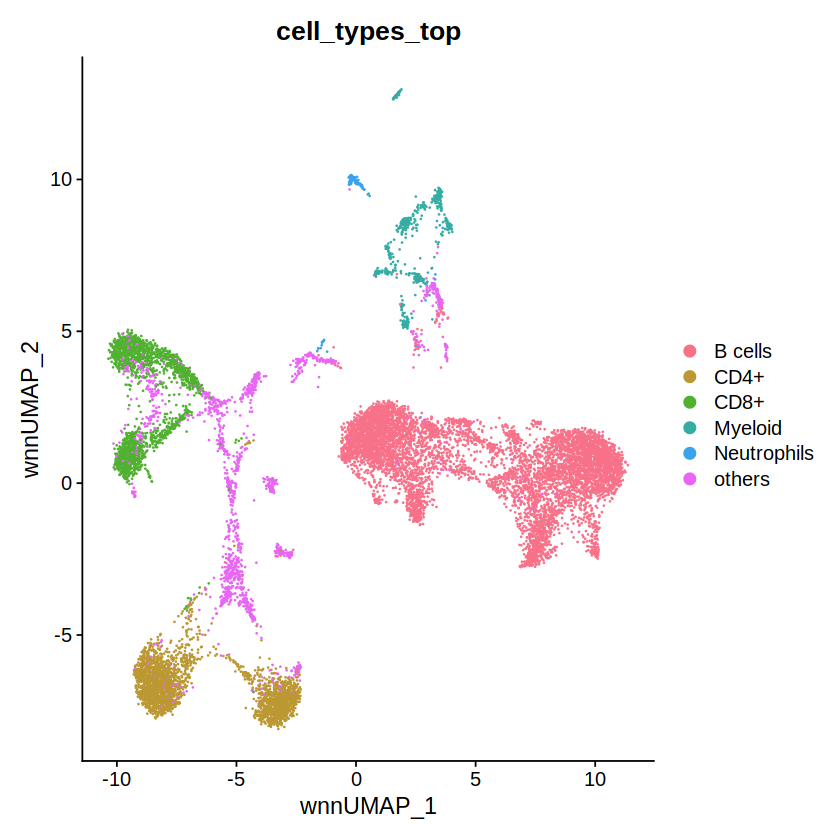

In [53]:
citeseq$cell_types_top<-ct_top3
colors <- c('#f77189','#bb9832','#50b131','#36ada4','#3ba3ec','#e866f4')

p1 <- DimPlot(citeseq, reduction = 'wnn.umap', group.by = 'cell_types_top', label = FALSE, repel = TRUE, label.size = 2.5) +
  scale_color_manual(values = colors)  # Apply the custom color palette
p1
ggsave(filename = "celltypewnn.pdf", plot = p1, width = 5, height = 4, units = "in")  # Adjust width and height as needed
